# Medical Expense prediction

## Features

- age : age of primary beneficiary

- sex : insurance contractor gender, female, male

- bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height , objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children : Number of children covered by health insurance / Number of dependents

- smoker : Does smoking (yes/no)

- region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

## Target

- charges : Individual medical costs billed by health insurance

## Importing necessary libraries for Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Reading Data using Pandas

In [2]:
med= pd.read_csv('insurance.csv')
m=med                 # as backup for futher use

In [3]:
med.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
med.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Cleaning Data
## Making required changes for better analysis

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
med['sex']=le.fit_transform(med['sex'])

In [8]:
med['smoker']=le.fit_transform(med['smoker'])

In [9]:
med['region']=le.fit_transform(med['region'])

In [10]:
med

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
med.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [13]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [14]:
corr=med.corr()

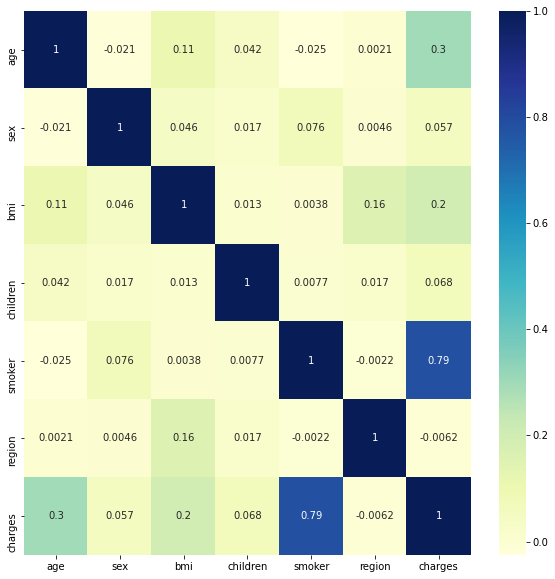

In [15]:
plt.figure(figsize=(10,10))

ax = sns.heatmap(corr, annot=True,cmap="YlGnBu")

<Figure size 432x288 with 0 Axes>

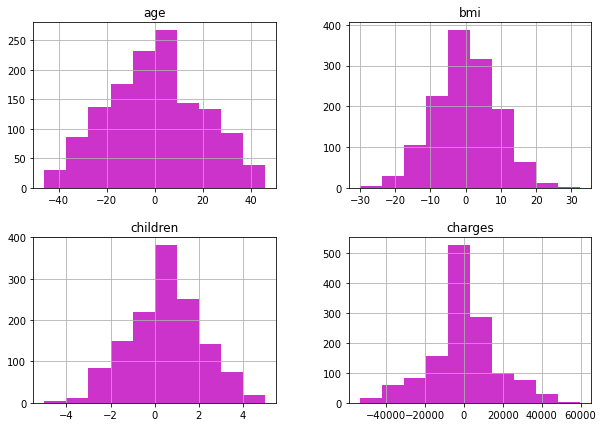

In [16]:
plt.figure()
m[['age','bmi','children','charges']].diff().hist(color='m',alpha=0.8, figsize=(10,7));

<Figure size 720x720 with 0 Axes>

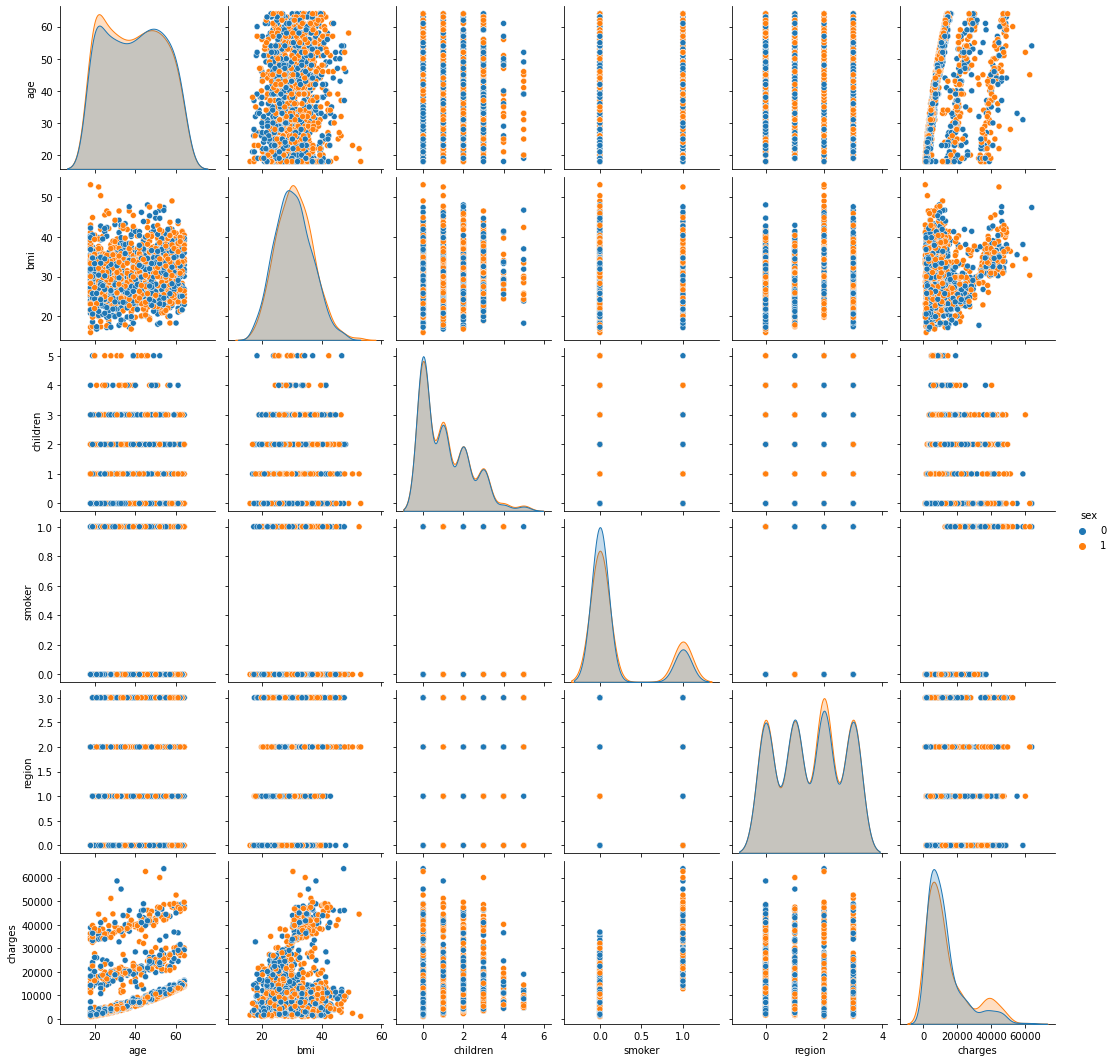

In [17]:
plt.figure(figsize=(10,10))
sns.pairplot(data=m,hue='sex');

[]

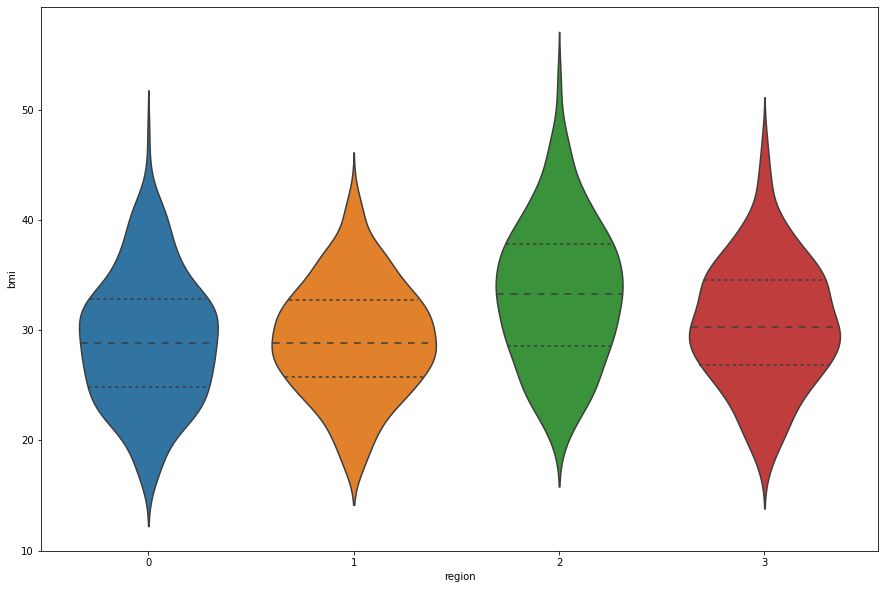

In [18]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="region", y="bmi", data=m, inner="quartile",)
ax.plot()

   ####                 Conclusion: People in north have lower bmi compared to people living in the south

## Split the data into training set and testing set using train_test_split

In [19]:
med.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
X=med[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=med['charges']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
lr=LinearRegression()

### Fitting Data

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

### Predicting from trained model

In [27]:
pred=lr.predict(X_test)

In [28]:
r2_score(y_test, pred)

0.7086110526020535

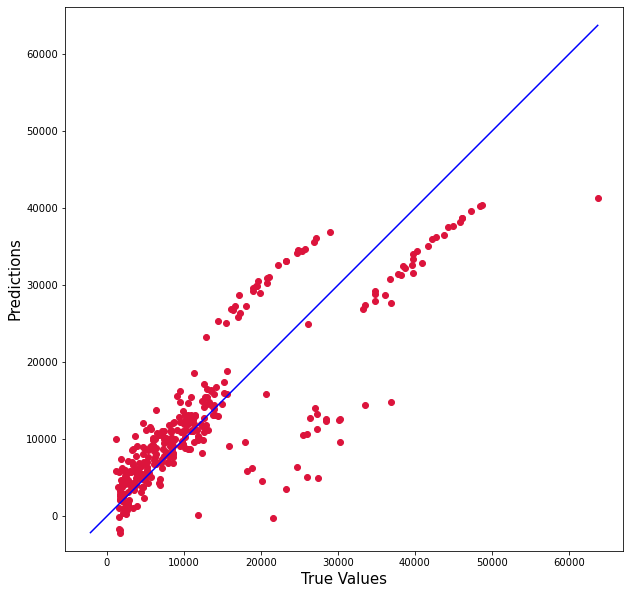

In [29]:
pred = lr.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [30]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4270.739507226349
MSE: 39486821.35160567
RMSE: 6283.854020551851


In [31]:
print(lr.score(X_test, y_test))

0.7086110526020535


# Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor


In [33]:
dtr=DecisionTreeRegressor()

## Fitting data

In [34]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

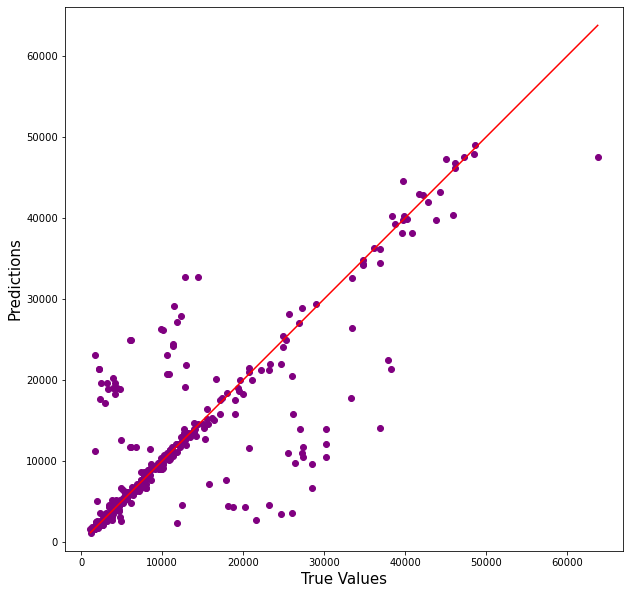

In [35]:
pred = dtr.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='purple')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [36]:
dtr.score(X_test,y_test)

0.6568252966406778

# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators = 16)
rfreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=16)

In [38]:
predict = rfreg.predict(X_test)
r2_score(y_test, predict)

0.7878138565795452

## Plot predicted vs actual results of best model - Random Forest Regression

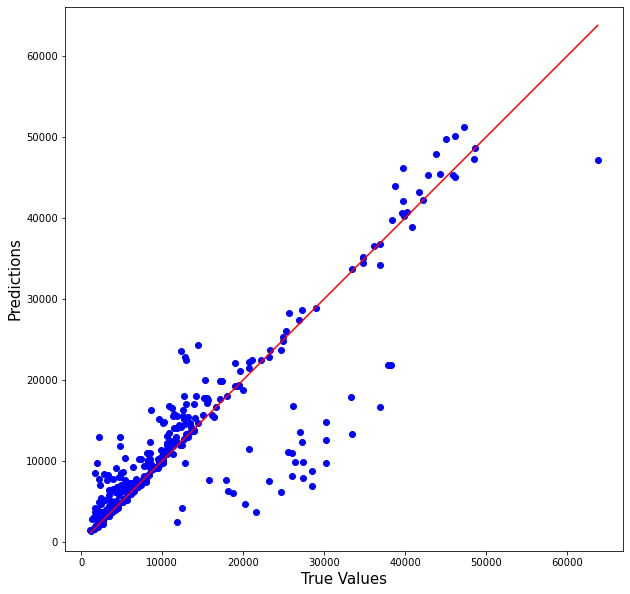

In [42]:
pred = rfreg.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='blue')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()